In [5]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (10,8) 

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal.

La Normalidad ya la evaluamos en el pair 02_test_estadisticos (nuestra variable respuesta no cumple la asunción de normalidad)

## Independencia de las variables

In [6]:
# Cargamos el archivo
df = pd.read_csv("../ficheros/diamons_01.csv", index_col= 0)
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [7]:
# Hacemos un info para recordarnos los datos que teníamos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50271 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50271 non-null  float64
 1   cut      50271 non-null  object 
 2   color    50271 non-null  object 
 3   clarity  50271 non-null  object 
 4   depth    50271 non-null  float64
 5   table    50271 non-null  float64
 6   price    50271 non-null  int64  
 7   x        50271 non-null  float64
 8   y        50271 non-null  float64
 9   z        50271 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [8]:
# Creamos un dataframe solo con las variables numéricas, excepto price, que es la variable respuesta
df_num = df.select_dtypes(include= np.number).drop("price", axis = 1)
df_num.head(2)

,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31


In [9]:
# Para las variables numéricas hacemos la correlación de Pearson para comprobar la asunción de independencia
df_num.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.046645,0.182910,0.981109,0.973211,0.956388
depth,0.046645,1.000000,-0.293858,-0.015709,-0.019036,0.115351
table,0.182910,-0.293858,1.000000,0.192680,0.183835,0.143727
x,0.981109,-0.015709,0.192680,1.000000,0.990734,0.965640
y,0.973211,-0.019036,0.183835,0.990734,1.000000,0.959578
z,0.956388,0.115351,0.143727,0.965640,0.959578,1.000000


Vemos que *carat* (quilates), *x* (ancho), *y* (alto) y *z* (profundidad) están fuertemente relacionadas entre ellas con una relación positiva. Y no están relacionados con *depth* y *table*

*Depth* y *table* no están relacionadas con ninguna otra ni entre sí.

*Depth* y *table* sí cumplen la asunción de independencia entre ellas y con las demás, mientras que el resto no

In [10]:
# Hacemos un dataframe solo con las columnas categóricas
df_cat = df.select_dtypes(include= "object")
df_cat.head(2)

,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1


Para comprobar la asunción de independencia con las columnas categóricas, hacemos un crosstab

In [11]:
# Primero haremos entre cut y color
crosstab, test_results, expected = rp.crosstab(df_cat["cut"], df_cat["color"], test= "chi-square", expected_freqs= True, prop= "cell")

In [12]:
crosstab.head()

color                                           
color         D     E     F     G     H     I     J    All
cut                                                       
Fair       0.31  0.43  0.59  0.58  0.55  0.33  0.21   2.98
Good       1.27  1.78  1.74  1.64  1.29  0.92  0.57   9.21
Ideal      5.45  7.54  7.20  9.13  5.77  3.77  1.59  40.45
Premium    3.01  4.37  4.29  5.29  4.20  2.39  1.30  24.86
Very Good  2.87  4.60  4.09  4.30  3.34  2.11  1.20  22.50

In [13]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 24.0) =,274.7858
1,p-value =,0.0000
2,Cramer's V =,0.0370


Entre *cut* y *color*, como el p-valor es menor que 0.05, entonces podemos rechazar la H0, lo que quiere decir que son dependientes. Lo mismo nos indica la V de Crammer, que está entre 0 y 0.1

No cumplen la asunción de independencia

In [14]:
# Ahora haremos entre cut y clarity
crosstab2, test_results2, expected2 = rp.crosstab(df_cat["cut"], df_cat["clarity"], test= "chi-square", expected_freqs= True, prop= "cell")

In [15]:
crosstab2

clarity                                                      
clarity        I1    IF    SI1    SI2    VS1    VS2  VVS1  VVS2     All
cut                                                                    
Fair         0.41  0.02   0.77   0.82   0.32   0.48  0.03  0.13    2.98
Good         0.19  0.12   2.95   1.97   1.22   1.83  0.37  0.55    9.21
Ideal        0.28  2.30   8.00   4.67   6.81   9.55  3.92  4.92   40.45
Premium      0.40  0.42   6.53   5.04   3.61   6.04  1.17  1.65   24.86
Very Good    0.17  0.48   6.10   3.77   3.34   4.75  1.53  2.37   22.50
All          1.44  3.35  24.36  16.27  15.29  22.65  7.02  9.62  100.00

In [16]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 28.0) =,4167.2329
1,p-value =,0.0000
2,Cramer's V =,0.1440


*Cut* y *clarity* : Como el p-valor es menor que 0.05, entonces podemos rechazar la H0, lo que quiere decir que son dependientes. Lo mismo nos indica la V de Crammer, que está entre 0.1 y 0.3

No cumplen la asunción de independencia

In [17]:
# Ahora haremos entre color y clarity
crosstab3, test_results3, expected3 = rp.crosstab(df_cat["color"], df_cat["clarity"], test= "chi-square", expected_freqs= True, prop= "cell")

In [18]:
crosstab3.head()

clarity                                                 
clarity      I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2    All
color                                                           
D          0.08  0.09  4.00  2.60  1.37  3.27  0.47  1.03  12.91
E          0.20  0.28  4.66  3.20  2.46  4.73  1.26  1.92  18.72
F          0.28  0.72  4.02  2.96  2.59  4.07  1.39  1.87  17.91
G          0.30  1.31  3.76  2.73  3.94  4.26  1.91  2.72  20.94
H          0.32  0.56  4.11  2.62  2.20  3.04  1.15  1.14  15.15

In [19]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 42.0) =,1998.9648
1,p-value =,0.0000
2,Cramer's V =,0.0814


*Color* y *clarity* : Como el p-valor es menor que 0.05, entonces podemos rechazar la H0, lo que quiere decir que son dependientes. Lo mismo nos indica la V de Crammer, que está entre 0 y 0.1

No cumplen la asunción de independencia

## Homogeneidad de varianzas

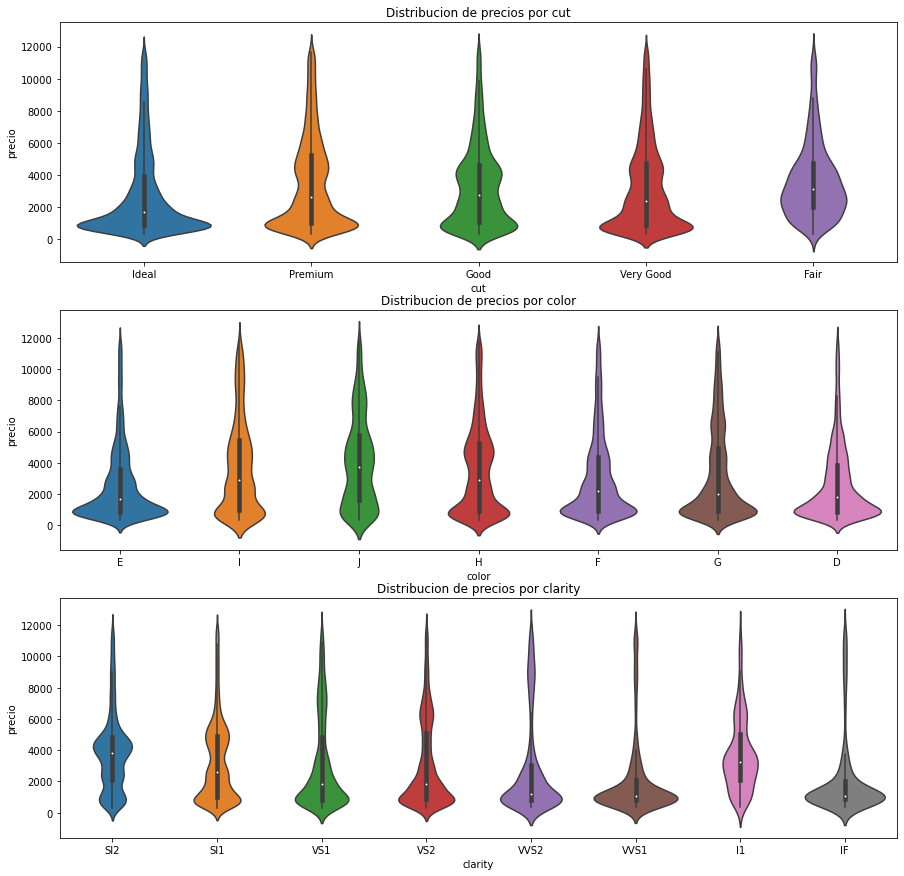

In [20]:
# Primero lo intentaremos ver visualmente de las variables categóricas, con un violinplot
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
for i, col in enumerate(df_cat.columns):
    sns.violinplot(
    x       = col,
    y       = 'price',
    data    = df,
    palette = 'tab10',
    ax= ax[i])
    ax[i].set_title(f"Distribucion de precios por {col}")
    ax[i].set_ylabel("precio")
    ax[i].set_xlabel(col);

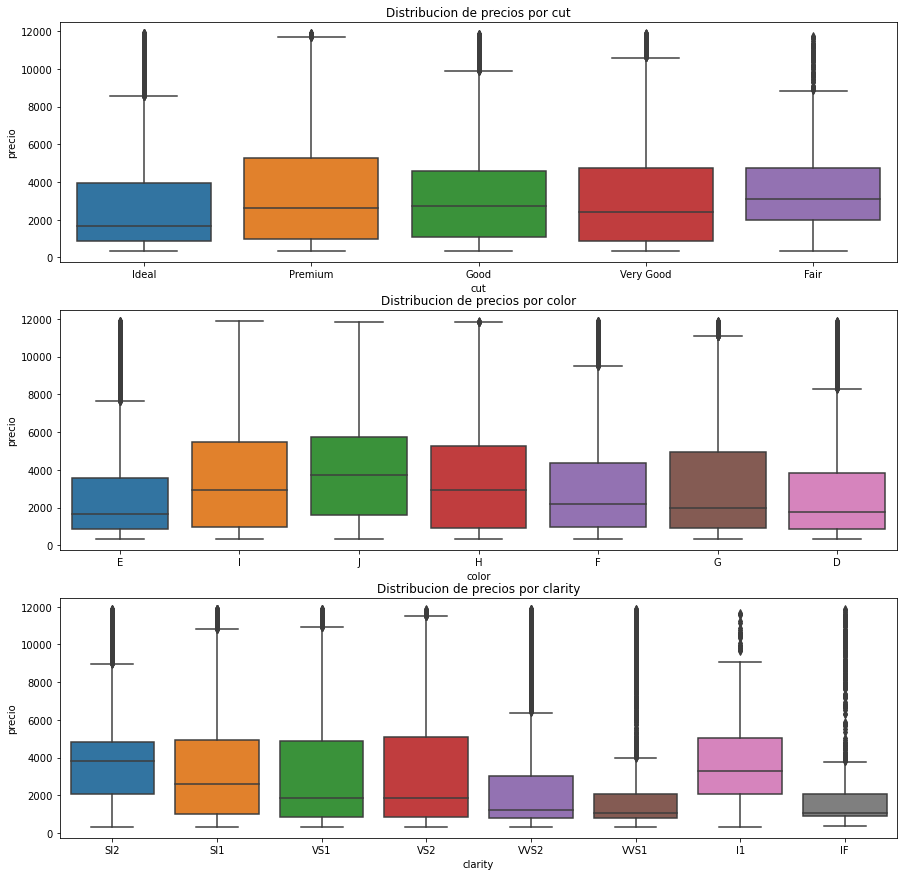

In [21]:
# Intentamos lo mismo con un boxplot
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
for i, col in enumerate(df_cat.columns):
    sns.boxplot(
    x       = col,
    y       = 'price',
    data    = df,
    palette = 'tab10',
    ax= ax[i])
    ax[i].set_title(f"Distribucion de precios por {col}")
    ax[i].set_ylabel("precio")
    ax[i].set_xlabel(col);

Aquí hacemos un análisis visual solamente, luego lo confirmaremos o no analíticamente
- Respecto al corte:

    En el violinplot y en el boxplot parece que no hay mucha diferencia entre las medianas. 

- Respecto al color:

    Algunos colores parecen más homogeneos (E, F, G Y D), pero entre otros como el E y el J no hay nada que ver

- Respecto a clarity:

    Aquí se ve claramente que no tienen nada que ver, parecen completamente heterogeneas

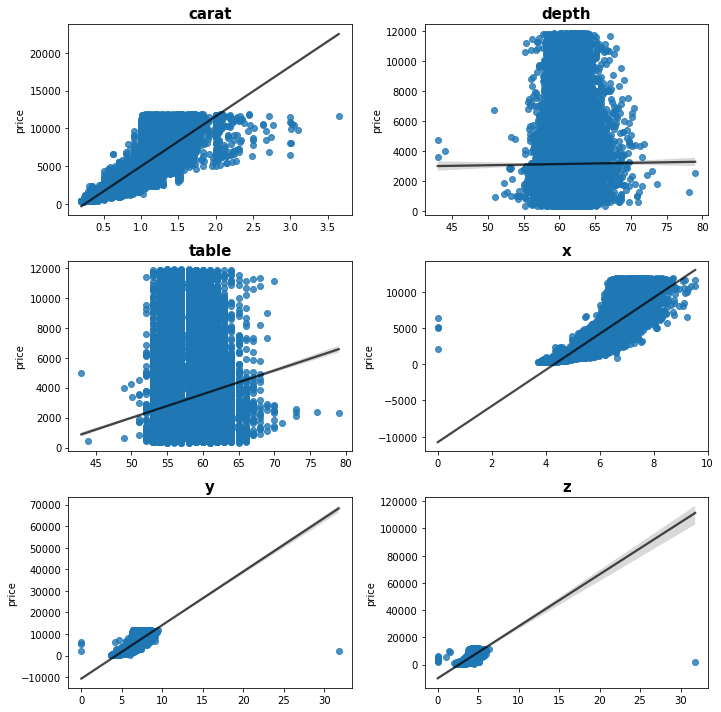

In [22]:
# Hacemos ahora las gráficas para las variables numéricas
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))

axes = axes.flat

for i, colum in enumerate(df_num.columns): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'price',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

Como podemos ver, no se cumple la asunción de homocedasticidad, excepto para la variable depth, que sí que parece cumplir la asunción

Comprobamos ahora analíticamente, primero para las variables categóricas

In [23]:
# Realizamos una función para hacer el test de levene con las columnas categóricas, tendremos que pasarle la columna que queramos y el dataframe
def test_levene_cat(col, dataf):
    # Creamos una lista con los valores únicos de la variable
    lista = dataf[col].unique()
    # Creamos una lista donde apendearemos los dataframes
    lista_df = []
    # Iteramos por la lista de valores únicos
    for i in lista:
        # Creamos dataframes con la columna price filtrada por la condición de que la variable que le pasamos sea igual a i (valor único)
        lista_df.append(dataf[dataf[col] == i]["price"])
    # Nos devuelve dos parametros, la lista de los datrafames y la longitud de la lista
    return lista_df, len(lista_df)

In [24]:
# Llamamos a la función para la columna color
lista_color, long_color = test_levene_cat("color", df)

In [25]:
# Comprobamos la longitud para saber cuantas veces tenemos que pasar la lista
long_color

7

In [26]:
# Realizamos el test de levene
levene_test = stats.levene(lista_color[0],lista_color[1], lista_color[2], lista_color[3], lista_color[4], lista_color[5], lista_color[6], center= "median")
levene_test

LeveneResult(statistic=167.9056924235084, pvalue=3.08872167281537e-212)

In [27]:
# Hacemos lo mismo para la variable cut
lista_cut, long_cut = test_levene_cat("cut", df)

In [28]:
long_cut

5

In [29]:
levene_test = stats.levene(lista_cut[0],lista_cut[1], lista_cut[2], lista_cut[3], lista_cut[4], center= "median")
levene_test

LeveneResult(statistic=107.62588020188849, pvalue=1.7646831446997582e-91)

In [30]:
# Hacemos lo mismo para clarity
lista_clarity, long_clarity = test_levene_cat("clarity", df)

In [31]:
long_clarity

8

In [32]:
levene_test = stats.levene(lista_clarity[0],lista_clarity[1], lista_clarity[2], lista_clarity[3], lista_clarity[4], lista_clarity[5], lista_clarity[6], lista_clarity[7], center= "median")
levene_test

LeveneResult(statistic=101.04461776506251, pvalue=2.0777011986691076e-147)

Podemos observar que para todas las variables categóricas el p-valor es menor que 0.05, por lo que tampoco cumplen la asunción de homocedasticidad.

Hacemos ahora para las variables númericas

In [33]:
resultados = {}
for col in df_num.columns:
    statistic, p_val = levene(df[col], df["price"], center= "median")
    resultados[col] = p_val

In [34]:
resultados

{'carat': 0.0, 'depth': 0.0, 'table': 0.0, 'x': 0.0, 'y': 0.0, 'z': 0.0}

Todos los valores para el test de Levene con las variables numéricas son menores que 0.05. Por lo tanto no son homocedasticos, incluso la variable depth